In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit


In [74]:
file_path = '/Users/chiaradraghini/Documents/iot_wi_project/data/dataset/'
dataframe = pd.read_csv(file_path+'Dataset_iotwi.csv')
dataframe.drop(['Unnamed: 0'], axis=1, inplace=True)
dataframe

,Time Interval,Average Packet Size,Standard Deviation Packet Size,Median Packet Size,Average Packet Intervals,Standard Deviation Packet Intervals,Median Packet Intervals,Inbound Packets,Outbound Packets,Total Packets
0,"(0, 0.5)",956.114286,208.242569,1023.0,0.004413,0.005065,0.000492,47,58,105
1,"(0.5, 1.0)",933.644928,241.450296,961.0,0.003510,0.004490,0.000742,77,61,138
2,"(1.0, 1.5)",919.227273,252.522348,888.5,0.003205,0.004270,0.000585,95,59,154
3,"(1.5, 2.0)",955.713115,227.083975,1078.0,0.004066,0.004688,0.001061,64,58,122
4,"(2.0, 2.5)",929.561404,248.768508,1028.0,0.004378,0.004975,0.001581,61,53,114
...,...,...,...,...,...,...,...,...,...,...
1200,"(600.0, 600.5)",1031.739583,321.145294,1131.0,0.004865,0.006184,0.000956,78,18,96
1201,"(600.5, 601.0)",974.734043,331.268146,1108.5,0.005336,0.006885,0.001814,73,21,94
1202,"(601.0, 601.5)",993.343434,331.198755,1126.0,0.004406,0.006043,0.001021,80,19,99
1203,"(601.5, 602.0)",995.216495,317.852994,1118.0,0.004635,0.006014,0.000910,74,23,97


In [75]:
cols_to_keep = ["Average Packet Size","Standard Deviation Packet Size","Median Packet Size","Average Packet Intervals","Standard Deviation Packet Intervals", "Median Packet Intervals" ,"Inbound Packets", "Outbound Packets","Total Packets"]
df_filtered = dataframe.loc[:,cols_to_keep]
df_filtered

,Average Packet Size,Standard Deviation Packet Size,Median Packet Size,Average Packet Intervals,Standard Deviation Packet Intervals,Median Packet Intervals,Inbound Packets,Outbound Packets,Total Packets
0,956.114286,208.242569,1023.0,0.004413,0.005065,0.000492,47,58,105
1,933.644928,241.450296,961.0,0.003510,0.004490,0.000742,77,61,138
2,919.227273,252.522348,888.5,0.003205,0.004270,0.000585,95,59,154
3,955.713115,227.083975,1078.0,0.004066,0.004688,0.001061,64,58,122
4,929.561404,248.768508,1028.0,0.004378,0.004975,0.001581,61,53,114
...,...,...,...,...,...,...,...,...,...
1200,1031.739583,321.145294,1131.0,0.004865,0.006184,0.000956,78,18,96
1201,974.734043,331.268146,1108.5,0.005336,0.006885,0.001814,73,21,94
1202,993.343434,331.198755,1126.0,0.004406,0.006043,0.001021,80,19,99
1203,995.216495,317.852994,1118.0,0.004635,0.006014,0.000910,74,23,97


In [76]:
file_path = '/Users/chiaradraghini/Documents/iot_wi_project/data/dataset/'
data_for_persona = pd.read_csv(file_path+'Dataset_iotwi_persona.csv', sep = ";") #a column "Persona" with "truth table" was added
data_for_persona.drop(['Unnamed: 0'], axis=1, inplace=True)
persona = data_for_persona["Persona"]

In [77]:
X = df_filtered
y = data_for_persona['Persona']

In [78]:
standardizer = StandardScaler()
X = standardizer.fit_transform(X)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85)

In [94]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [95]:
predictions = model.predict(X_test)
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0])

In [99]:
#here the corresponding indexes (to each we have a time interval associated) of the predictions and truths are shown
dft = pd.DataFrame()
dft["Ground truth"] = y_test
dft["Predictions"] = predictions
dft

,Ground truth,Predictions
399,0,0
1187,0,0
290,1,1
562,1,1
937,0,0
...,...,...
1173,0,0
104,1,1
1100,0,0
91,1,1


In [96]:
cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

precision = TP / (TP + FP)

recall = TP/ (TP + FN )

f1 = 2*(recall * precision) / (recall + precision)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))
print('Precision of the binary classification = {:0.3f}'.format(precision))
print('Recall of the binary classification = {:0.3f}'.format(recall))
print('F1 Score of the binary classification = {:0.3f}'.format(f1))

True Positive(TP)  =  104
False Positive(FP) =  7
True Negative(TN)  =  116
False Negative(FN) =  14
Accuracy of the binary classification = 0.913
Precision of the binary classification = 0.937
Recall of the binary classification = 0.881
F1 Score of the binary classification = 0.908


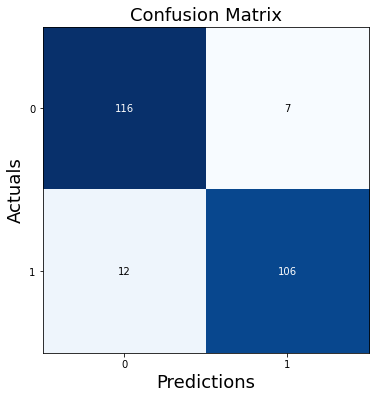

In [93]:
conf_matrix = metrics.confusion_matrix(y_test, predictions)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18, color = "black")
plt.ylabel('Actuals', fontsize=18, color = "black")
plt.title('Confusion Matrix', fontsize=18, color = "black")
plt.show()

In [84]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    """Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve."""
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

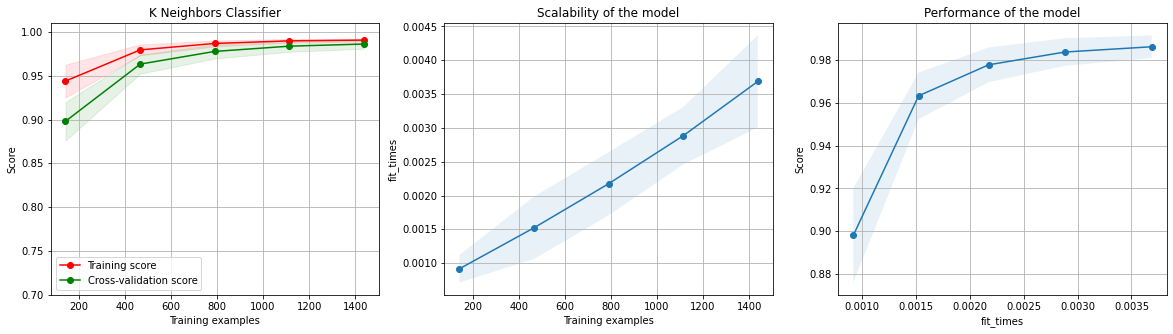

In [85]:
#Learning curve
X, y = load_digits(return_X_y=True)

title = "K Neighbors Classifier"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = KNeighborsClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()